### Получение наборов положительных  отрицательных обучающих выборок.

In [3]:
%matplotlib inline
from sklearn.feature_extraction.image import PatchExtractor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from skimage import data, color, feature
from os.path import isfile, join
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from skimage import transform
from itertools import chain
import numpy as np
import cv2
import os
import random

In [4]:
def def_positive_patches():
    dst_path="D://new//positive_1"
    onlyfiles = [f for f in os.listdir(dst_path) if isfile(join(dst_path, f))]
    positive_patches = []
    for n in range(0, len(onlyfiles)):
        print(onlyfiles[n])
        positive_patches.append(cv2.imread(os.path.join(dst_path,onlyfiles[n]), 
                                           cv2.IMREAD_GRAYSCALE))
    return positive_patches

In [5]:
def def_positive_test_patches():
    dst_path_test="D://new//positive_test"
    onlyfiles_test = [f for f in os.listdir(dst_path_test) if isfile(join(dst_path_test, f))]
    positive_test_patches = []
    for n in range(0, len(onlyfiles_test)):
        print(onlyfiles_test[n])
        positive_test_patches.append(cv2.imread(os.path.join(dst_path_test,onlyfiles_test[n]), 
                                                cv2.IMREAD_GRAYSCALE))
    return positive_test_patches

In [6]:
def def_negative_patches():
    mypath = "D://new//negative"
    onlyfiles2 = [f for f in os.listdir(mypath) if isfile(join(mypath, f))]
    negative_patches = []
    for n in range(0, len(onlyfiles2)):
        print(onlyfiles2[n])
        negative_patches.append(cv2.imread(os.path.join(mypath,onlyfiles2[n]), 
                                           cv2.IMREAD_GRAYSCALE))
    return negative_patches 

In [7]:
def def_negative_test_patches():
    mypath_test = "D://new//negative_test"
    onlyfiles2_test = [f for f in os.listdir(mypath_test) if isfile(join(mypath_test, f))]
    negative_test_patches = []
    for n in range(0, len(onlyfiles2_test)):
        print(onlyfiles2_test[n])
        negative_test_patches.append(cv2.imread(os.path.join(mypath_test,onlyfiles2_test[n]), 
                                                cv2.IMREAD_GRAYSCALE))
    return negative_test_patches 

### Объединие наборов и выделение HOG-признака.

In [9]:
positive_patches=def_positive_patches()
negative_patches=def_negative_patches()

In [166]:
positive_test_patches=def_positive_test_patches()
negative_test_patches=def_negative_test_patches()

100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg
110.jpg
111.jpg
112.jpg
113.jpg
114.jpg
115.jpg
116.jpg
117.jpg
118.jpg
119.jpg
120.jpg
121.jpg
122.jpg
123.jpg
124.jpg
125.jpg
126.jpg
127.jpg
128.jpg
129.jpg
130.jpg
92.jpg
93.jpg
94.jpg
95.jpg
96.jpg
97.jpg
98.jpg
99.jpg
131.jpg
132.jpg
133.jpg
134.jpg
135.jpg
136.jpg
137.jpg
138.jpg
139.jpg
140.jpg
141.jpg
142.jpg
143.jpg
144.jpg
145.jpg
146.jpg
147.jpg
148.jpg
149.jpg
150.jpg
151.jpg
152.jpg
153.jpg
154.jpg
155.jpg
156.jpg
157.jpg
158.jpg
159.jpg
160.jpg
161.jpg
162.jpg
163.jpg
164.jpg
165.jpg
166.jpg
167.jpg
168.jpg
169.jpg


In [167]:
X_test = np.array([feature.hog(im) for im in chain(positive_test_patches,
                                                    negative_test_patches)])
print(X_test)
y_test = np.zeros(X_test.shape[0])
y_test[0:len(positive_test_patches)] = 1

[[0.00153251 0.00049197 0.00146996 ... 0.00094964 0.00105697 0.00049674]
 [0.00259461 0.00244506 0.00252571 ... 0.00104575 0.00286742 0.00166844]
 [0.00581313 0.00406272 0.00783905 ... 0.00041603 0.0003289  0.00069771]
 ...
 [0.01930718 0.00394278 0.00950201 ... 0.01189027 0.00807209 0.01260255]
 [0.00912566 0.00564055 0.01196531 ... 0.01518242 0.00074452 0.00405065]
 [0.01024804 0.         0.00323728 ... 0.00824157 0.0030632  0.0009392 ]]


C:\tools\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [168]:
X_train = np.array([feature.hog(im) for im in chain(positive_patches,
                                                    negative_patches)])
print(X_train)
y_train = np.zeros(X_train.shape[0])
y_train[0:len(positive_patches)] = 1
score = cross_val_score(estimator=GaussianNB(), X=X_train, y=y_train, cv=5)

[[0.00284733 0.00152215 0.00272925 ... 0.000668   0.00375679 0.00351273]
 [0.00527538 0.00316102 0.00317426 ... 0.00215713 0.00126373 0.00116347]
 [0.00369075 0.00306422 0.0144263  ... 0.00168864 0.00092865 0.00080228]
 ...
 [0.02109295 0.00325179 0.01669701 ... 0.00717414 0.00852783 0.01747824]
 [0.00739647 0.00357821 0.00424909 ... 0.01371025 0.02455088 0.00713566]
 [0.01102999 0.         0.00406924 ... 0.01231852 0.01097424 0.01079164]]


### Обучение методом опорных векторов.

In [169]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_

C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9725274725274725

In [170]:
grid.best_params_

{'C': 8.0}

### Обучение оптимального оценивателя на полном наборе данных: 

In [171]:
model = grid.best_estimator_
model.fit(X_train, y_train)

LinearSVC(C=8.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [172]:
model_predictions = model.predict(X_test) 

In [173]:
accuracy_score(y_test,model_predictions)

0.9615384615384616

### Выполнение поиска в новом изображении.

In [231]:
dst_path="D://20.jpg"
test_image = cv2.imread(dst_path)

C:\tools\Anaconda3\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
C:\tools\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\tools\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


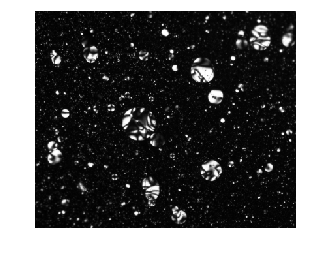

In [232]:
test_image =color.rgb2gray(test_image)
test_image = transform.rescale(test_image, 0.65)
#test_image = test_image[:160, 40:180]
plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [233]:
def sliding_window(img, patch_size=positive_patches[0].shape,
                  istep=8, jstep=8, scale=1.0):
    Ni, Nj = (int(scale*s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

C:\tools\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


(1748, 324)

In [234]:
labels = model.predict(patches_hog)
labels.sum()

79.0

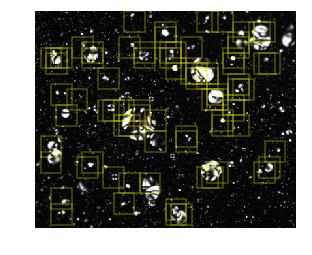

In [235]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')
Ni, Nj = positive_patches[0].shape
indices = np.array(indices)
for i, j in indices[labels == 1]: 
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='yellow',
                               alpha=0.3, lw=1.5,
                               facecolor='none'))

In [241]:
dst_path="D://16.jpg"
test_image = cv2.imread(dst_path)

C:\tools\Anaconda3\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
C:\tools\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\tools\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


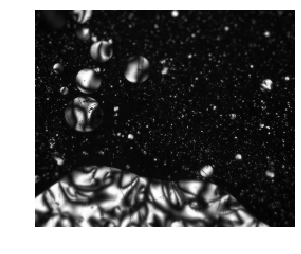

In [242]:
test_image =color.rgb2gray(test_image)
test_image = transform.rescale(test_image, 0.4)
#test_image = test_image[:160, 40:180]
plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [243]:
def sliding_window(img, patch_size=positive_patches[0].shape,
                  istep=8, jstep=8, scale=1.0):
    Ni, Nj = (int(scale*s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

C:\tools\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


(594, 324)

In [244]:
labels = model.predict(patches_hog)
labels.sum()

35.0

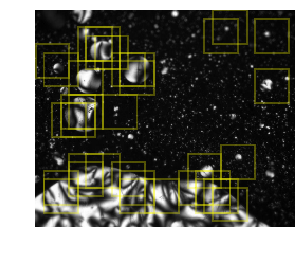

In [245]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')
Ni, Nj = positive_patches[0].shape
indices = np.array(indices)
for i, j in indices[labels == 1]: 
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='yellow',
                               alpha=0.3, lw=2,
                               facecolor='none'))

In [310]:
dst_path="D://2.jpg"
test_image = cv2.imread(dst_path)

C:\tools\Anaconda3\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
C:\tools\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\tools\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


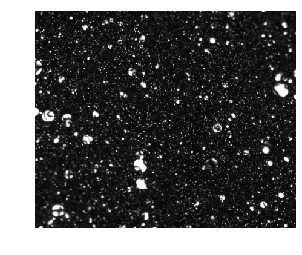

In [311]:
test_image =color.rgb2gray(test_image)
test_image = transform.rescale(test_image, 0.7)
#test_image = test_image[:160, 40:180]
plt.imshow(test_image, cmap='gray')
plt.axis('off');

### Создание окна, которое будет перемещаться по фрагментам изображения с вычислением HOG-признаков для каждого фрагмента: 

In [312]:
def sliding_window(img, patch_size=positive_patches[0].shape,
                  istep=4, jstep=4, scale=1.0):
    Ni, Nj = (int(scale*s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

C:\tools\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


(8200, 324)

In [313]:
labels = model.predict(patches_hog)
labels.sum()

114.0

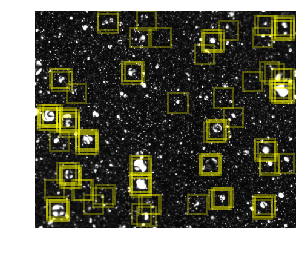

In [314]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')
Ni, Nj = positive_patches[0].shape
indices = np.array(indices)
for i, j in indices[labels == 1]: 
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='yellow',
                               alpha=0.3, lw=2,
                               facecolor='none'))